In [1]:
!pip install deap
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 4.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.0 MB/s eta 0:00:00


**Dataset:** https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

**Algorithm:** SVM 

In [2]:
import numpy as np
import pandas as pd
from pandas import read_csv

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

data = read_csv(url, header=None)

data

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
print(data[6].unique())
data = data.replace('?', np.nan)
data[6] = pd.to_numeric(data[6])
data[6] = data[6].fillna(data[6].median())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [4]:
print(data[6].unique())

[ 1. 10.  2.  4.  3.  9.  7.  5.  8.  6.]


In [5]:
X = data.iloc[:, 1:9]
y = data.iloc[:, 10:11]

X

,1,2,3,4,5,6,7,8
0,5,1,1,1,2,1.0,3,1
1,5,4,4,5,7,10.0,3,2
2,3,1,1,1,2,2.0,3,1
3,6,8,8,1,3,4.0,3,7
4,4,1,1,3,2,1.0,3,1
...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1
695,2,1,1,1,2,1.0,1,1
696,5,10,10,3,7,3.0,8,10
697,4,8,6,4,3,4.0,10,6


In [6]:
y

,10
0,2
1,2
2,2
3,2
4,2
...,...
694,2
695,2
696,4
697,4


In [7]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

#encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
#X = encoder.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X

,1,2,3,4,5,6,7,8
0,5,1,1,1,2,1.0,3,1
1,5,4,4,5,7,10.0,3,2
2,3,1,1,1,2,2.0,3,1
3,6,8,8,1,3,4.0,3,7
4,4,1,1,3,2,1.0,3,1
...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1
695,2,1,1,1,2,1.0,1,1
696,5,10,10,3,7,3.0,8,10
697,4,8,6,4,3,4.0,10,6


In [ ]:
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [8]:
from sklearn import model_selection
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

In [9]:
svm_classifier = svm.SVC(probability=True)
cv_results = model_selection.cross_val_score(svm_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[SVM] mean: ',cv_results.mean())

[SVM] mean:  0.9694805194805195


In [10]:
dt_classifier = DecisionTreeClassifier()
cv_results = model_selection.cross_val_score(dt_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[DT] mean: ',cv_results.mean())

[DT] mean:  0.930194805194805


In [11]:
knn_classifier = KNeighborsClassifier()
cv_results = model_selection.cross_val_score(knn_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[KNN] mean: ',cv_results.mean())

[KNN] mean:  0.9605194805194806


In [12]:
gb_classifier = GradientBoostingClassifier()
cv_results = model_selection.cross_val_score(gb_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[GB] mean: ',cv_results.mean())

[GB] mean:  0.9515909090909089


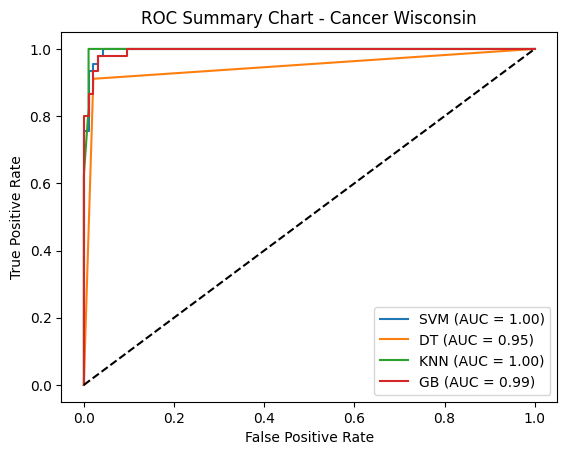

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

svm_classifier.fit(X_train,y_train)
dt_classifier.fit(X_train,y_train)
knn_classifier.fit(X_train,y_train)
gb_classifier.fit(X_train,y_train)

# Now you have the true labels and predicted probabilities/scores
y_true = y_test  # True labels from the test data


# Make predictions using your trained model
y_pred1 = svm_classifier.predict_proba(X_test)[::,1]
fpr1, tpr1, thresholds1 = roc_curve(y_true, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

# Make predictions using your trained model
y_pred2 = dt_classifier.predict_proba(X_test)[::,1]
fpr2, tpr2, thresholds2 = roc_curve(y_true, y_pred2)
roc_auc2 = auc(fpr2, tpr2)

# Make predictions using your trained model
y_pred3 = knn_classifier.predict_proba(X_test)[::,1] 
fpr3, tpr3, thresholds3 = roc_curve(y_true, y_pred3)
roc_auc3 = auc(fpr3, tpr3)

# Make predictions using your trained model
y_pred4 = gb_classifier.predict_proba(X_test)[::,1] 
fpr4, tpr4, thresholds3 = roc_curve(y_true, y_pred4)
roc_auc4 = auc(fpr4, tpr4)

# Plotting the ROC curve
plt.plot(fpr1, tpr1, label='SVM (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='DT (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='KNN (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='GB (AUC = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Summary Chart - Cancer Wisconsin')
plt.legend(loc='lower right')
plt.show()